In [1]:
import h5py

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rfest import ASD, ALD
from rfest import get_sdm, get_spatial_and_time_filters

## Load RGC calcium imaging data

In [2]:
with h5py.File('./data/RGC_dendrite.h5', 'r') as f:
    
    stimulus = np.array(f['stimulus'])
    response = np.array(f['response']) 
    
print("# rois = {}".format(response.shape[0]))

# rois = 19


In [3]:
roi_id = 0
dims = [5, 20, 15]
X = get_sdm(stimulus, dims[0])
y = response[roi_id] 

## ASD

In [9]:
dims = (5,20,15)
asd = ASD(X, y, dims=dims)
asd.fit(initial_params=[1., 1., 2., 2.3, 2.3], num_iters=5)

Iter	σ	ρ	δt	δy	δx	cost
   0	1.010	0.990	2.010	2.290	2.310	2320.664
   1	1.007	0.989	2.020	2.282	2.304	2327.306
   2	1.002	0.992	2.017	2.279	2.299	2327.576
   3	1.005	0.988	2.020	2.284	2.300	2328.278
   4	1.011	0.981	2.026	2.285	2.304	2324.945
Stop: reached maxiter = 5.


## ALD

In [10]:
dims = (5,20,15)
ald = ALD(X, y, dims=dims)

sigma0 = [1.]
rho0 = [1.]
params_t0 = [2., 2., 1., 1.] # taus, nus, tauf, nuf
params_y0 = [2., 10., 1., 1.]
params_x0 = [2., 7.5, 1., 1.]
init_params = sigma0 + rho0 + params_t0 + params_y0 + params_x0
ald.fit(initial_params=init_params, num_iters=5)

Iter	σ	ρ	τs_t	τf_t	τs_y	τf_y	τs_x	τf_x	cost
   0	0.990	0.990	1.990	1.010	1.990	1.010	1.990	1.010	-2335.053
   1	0.980	0.981	1.988	1.004	1.982	1.020	1.980	1.020	-2489.728
   2	0.970	0.980	1.984	1.002	1.973	1.030	1.976	1.029	-2624.461
   3	0.960	0.980	1.989	1.000	1.964	1.039	1.972	1.039	-2756.354
   4	0.950	0.978	1.992	0.999	1.955	1.049	1.967	1.048	-2891.729
Stop: reached maxiter = 5.


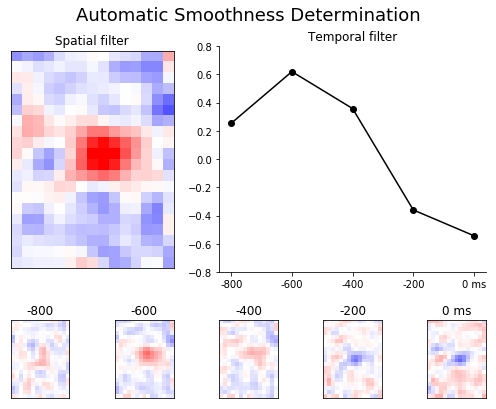

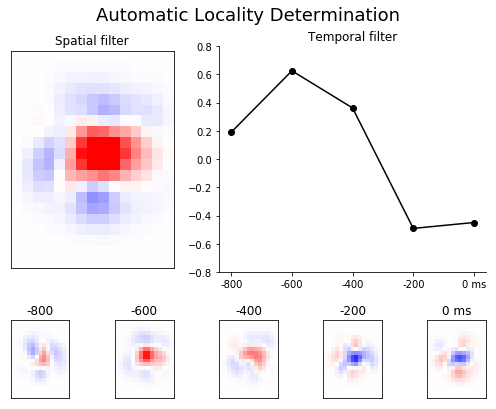

In [12]:
def plot_RF(k, dims, title=''):
    
    import matplotlib.gridspec as gridspec
    
    k_norm = k / np.linalg.norm(k)
    
    sRF, tRF = get_spatial_and_time_filters(k_norm, dims)
    
    fig = plt.figure(figsize=(7,6))
    spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig)
    ax0 = fig.add_subplot(spec[:2, :2])
    ax0.imshow(sRF, origin='lower', cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax0.set_title('Spatial filter')
#     ax0.axis('off')
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax1 = fig.add_subplot(spec[:2, 2:])
    
    labels = ['-800', '-600', '-400', '-200', '0 ms']
    ax1.plot(labels, tRF, 'ko-')
    ax1.set_ylim(-0.8, 0.8)
    ax1.set_title('Temporal filter')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
#     sns.despine(offset=3, trim=True)
    
    
    for i in range(dims[0]):
        ax = fig.add_subplot(spec[2, i])
        ax.imshow(k_norm.reshape(dims)[i], origin='lower', cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
        ax.set_title(labels[i])
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.suptitle(title, fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plot_RF(asd.w_opt, dims, 'Automatic Smoothness Determination')
plot_RF(ald.w_opt, dims, 'Automatic Locality Determination')